In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.

# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['train.csv', 'sample_submission.csv', 'test.csv']


IMPORTING SUITABLE LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics
from xgboost import XGBClassifier

Using TensorFlow backend.


IMPORTING THE DATASET

In [3]:
#train_data=pd.read_csv("../input/train.csv",low_memory=False)
%time
train_data = pd.read_csv('../input/train.csv',nrows=100000,low_memory=False)
print('Loading traininig data..')
test_data = pd.read_csv('../input/test.csv',nrows=100000,low_memory=False)
print('Loading test data..')
sub_data=pd.read_csv("../input/sample_submission.csv",nrows=100000,low_memory=False)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 5.72 µs
Loading traininig data..
Loading test data..


In [4]:
#print(sub_data.shape)#test_data=pd.read_csv("../input/test.csv",low_memory=False)

In [5]:
#sub_data#sumission_daata=pd.read_csv("../input/sample_submission_csv",low_memory=False)

In [6]:
#print("train data shape ={}".format(train_data.shape))
#print("test data shape ={}".format(test_data.shape))


In [7]:
train_data.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417e

In [8]:
train_data.describe()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,IsProtected,AutoSampleOptIn,SMode,IeVerIdentifier,Firewall,UacLuaenable,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_InternalBatteryNumberOfCharges,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
count,100000.0,99639.000000,100000.000000,4890.000000,99607.000000,99607.000000,99607.000000,100000.000000,100000.000000,96385.000000,69336.000000,99999.000000,100000.00000,100000.000000,100000.000000,99609.000000,100000.000000,94068.000000,99335.000000,98924.000000,99884.000000,98946.000000,98853.000000,99524.000000,99524.000000,99523.000000,9.939000e+04,9.939000e+04,100000.000000,99079.000000,99470.000000,99471.000000,99471.000000,9.695100e+04,100000.000000,100000.000000,99318.000000,100000.00000,100000.000000,16837.0,98187.0,36262.000000,97912.000000,98167.000000,100000.000000,36341.0,99815.000000,100000.000000,100000.00000,99157.000000,96585.000000,96585.000000,100000.000000
mean,0.0,6.845643,0.017630,1637.011247,47876.296023,1.322809,1.019989,0.987270,108.188050,81072.575307,24.887028,169.911139,123.11554,15720.155240,574.456210,0.944864,0.000030,0.000351,126.596869,0.977326,0.996216,2216.715077,239080.053564,3.988646,4.530555,2370.564201,5.129477e+05,3.771285e+05,0.075850,6112.640307,16.704980,1548.223864,897.919283,1.128907e+09,15834.706150,969.985240,14.622234,60.50777,0.000770,0.0,0.0,0.000359,401.715397,33056.529618,0.484990,0.0,0.006642,0.125420,0.03715,0.057515,0.281607,7.850960,0.499280
std,0.0,1.025645,0.131603,999.936760,14023.317478,0.519449,0.162839,0.112107,62.989406,48941.678952,5.642835,89.276001,69.53964,2192.122715,248.253105,0.228246,0.005477,0.018727,42.648675,0.148863,0.341617,1317.845445,72048.827406,2.064072,1.288238,841.604643,3.629911e+05,3.315180e+05,0.264759,5126.889792,5.997297,365.064440,213.345332,1.890562e+09,1960.625235,2921.356273,10.205771,45.02255,0.027738,0.0,0.0,0.018931,221.674626,21224.208041,0.499777,0.0,0.081230,0.331196,0.18913,0.232825,0.449785,4.565716,0.500002
min,0.0,0.000000,0.000000,1.000000,39.000000,1.000000,0.000000,0.000000,1.000000,7.000000,1.000000,1.000000,1.00000,7600.000000,16.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,74.000000,23.000000,1.000000,1.000000,10.000000,1.068000e+04,1.012900e+04,0.000000,512.000000,4.900000,-1.000000,-1.000000,0.000000e+00,10240.000000,0.000000,1.000000,5.00000,0.000000,0.0,0.0,0.000000,9.000000,5.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000
25%,0.0,7.000000,0.000000,788.000000,49480.000000,1.000000,1.000000,1.000000,51.000000,36303.000000,18.000000,89.000000,74.00000,15063.000000,256.000000,1.000000,0.000000,0.000000,111.000000,1.000000,1.000000,1443.000000,189586.000000,2.000000,5.000000,1998.000000,2.384750e+05,1.207430e+05,0.000000,4096.000000,13.900000,1366.000000,768.000000,0.000000e+00,15063.000000,165.000000,8.000000,31.00000,0.000000,0.0,0.0,0.000000,142.000000,13154.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 83 columns):
MachineIdentifier                                    100000 non-null object
ProductName                                          100000 non-null object
EngineVersion                                        100000 non-null object
AppVersion                                           100000 non-null object
AvSigVersion                                         100000 non-null object
IsBeta                                               100000 non-null int64
RtpStateBitfield                                     99639 non-null float64
IsSxsPassiveMode                                     100000 non-null int64
DefaultBrowsersIdentifier                            4890 non-null float64
AVProductStatesIdentifier                            99607 non-null float64
AVProductsInstalled                                  99607 non-null float64
AVProductsEnabled                                    9960

In [10]:
train_data.columns

Index(['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion',
       'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode',
       'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier',
       'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm',
       'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform',
       'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease',
       'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode',
       'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable',
       'Census_MDC2FormFactor', 'Census_DeviceFamily',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier',
       'Census_ProcessorModelIdentifier', 'Census_ProcessorClass',
       'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName',
       'Census_

In [11]:
train_data.HasDetections.unique()

array([0, 1])

In [12]:
data=test_data.drop(["MachineIdentifier"],axis=1)

In [13]:
#for i,j in train_data.groupby(["HasDetections"]):
#    print(i,j)

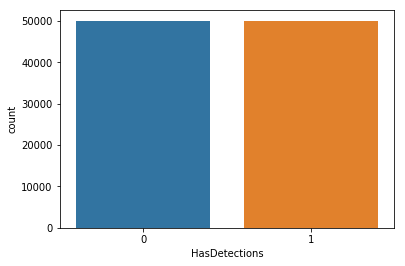

In [14]:
sns.countplot(train_data.HasDetections)

In [15]:
data.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,...,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,43,58552.0,18.0,53.0,42,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,NaN,NaN,108.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2689.0,30661.0,4.0,5.0,3063.0,...,488386.0,SSD,123179.0,0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,NaN,8.0,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,37.0,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,68,71395.0,NaN,276.0,74,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2206.0,242491.0,4.0,5.0,3410.0,...,1907729.0,HDD,1882352.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,NaN,0.0,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,7.0,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,2.0,1.0,1,201,66202.0,NaN,267.0,251,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,NaN,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189533.0,2.0,5.0,2097.0,...,29820.0,SSD,28678.0,0,4096.0,Notebook,13.9,1280.0,720.0,Mobile,NaN,0.0,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,2.0,1.0,1,29,120917.0,NaN,35.0,171,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2668.0,171228.0,2.0,5.0,1985.0,...,476940.0,HDD,439345.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,li-i,0.0,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,26.0,119,Notify,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,0.0,628.0,26320.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4,win8defender,1.1.15400.4,4

Text(0.5,1,'SmartScreen counts')

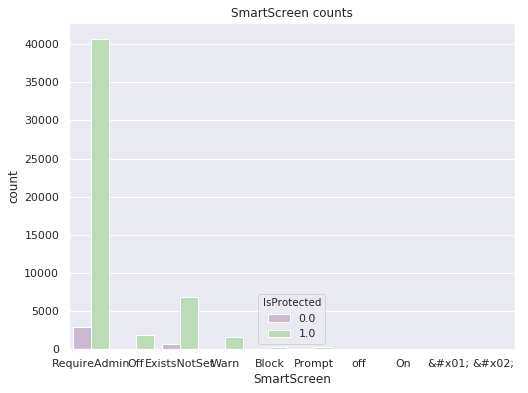

In [16]:
sns.set(rc={'figure.figsize':(8, 6)})
sns.countplot(x="SmartScreen", hue="IsProtected",  palette="PRGn", data=data)
plt.title("SmartScreen counts")

['windows10' 'windows8' 'windows2016' 'windows7']


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


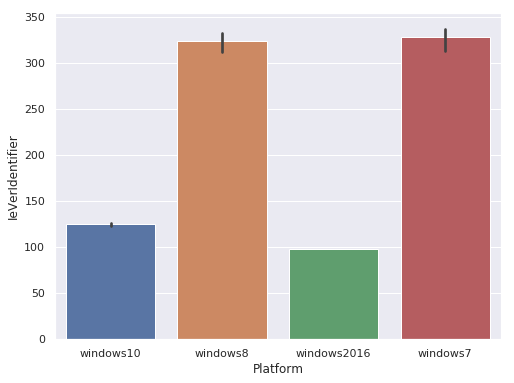

In [17]:
print(data.Platform.unique())
sns.barplot(x=data["Platform"][:1000],y=data["IeVerIdentifier"][:1000])

In [18]:
data.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,...,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,43,58552.0,18.0,53.0,42,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,NaN,NaN,108.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2689.0,30661.0,4.0,5.0,3063.0,...,488386.0,SSD,123179.0,0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,NaN,8.0,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,37.0,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,807.0,8554.0,1,NaN,0.0,0,0,0.0,0.0,7.0
1,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,68,71395.0,NaN,276.0,74,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2206.0,242491.0,4.0,5.0,3410.0,...,1907729.0,HDD,1882352.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,NaN,0.0,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,7.0,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,554.0,33105.0,1,NaN,0.0,0,0,0.0,1.0,12.0
2,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,NaN,49480.0,2.0,1.0,1,201,66202.0,NaN,267.0,251,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,NaN,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189533.0,2.0,5.0,2097.0,...,29820.0,SSD,28678.0,0,4096.0,Notebook,13.9,1280.0,720.0,Mobile,NaN,0.0,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,NaN,556.0,63396.0,1,NaN,0.0,0,0,0.0,1.0,11.0
3,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,NaN,42160.0,2.0,1.0,1,29,120917.0,NaN,35.0,171,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,NaN,NaN,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,2668.0,171228.0,2.0,5.0,1985.0,...,476940.0,HDD,439345.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,li-i,0.0,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,26.0,119,Notify,0,IS_GENUINE,OEM:DM,NaN,0.0,Retail,0.0,628.0,26320.0,1,0.0,0.0,0,0,0.0,0.0,10.0
4,win8defender,1.1.15400.4,4

In [19]:
data.IsProtected.unique()

array([ 1.,  0., nan])

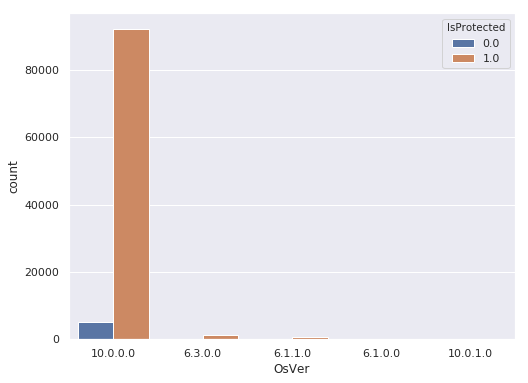

In [20]:
sns.countplot(x="OsVer",hue="IsProtected",data=data)

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ValueError: cannot convert float NaN to integer

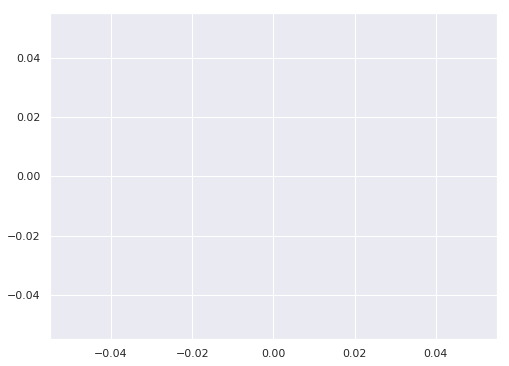

In [21]:
sns.distplot(data.Census_SystemVolumeTotalCapacity)

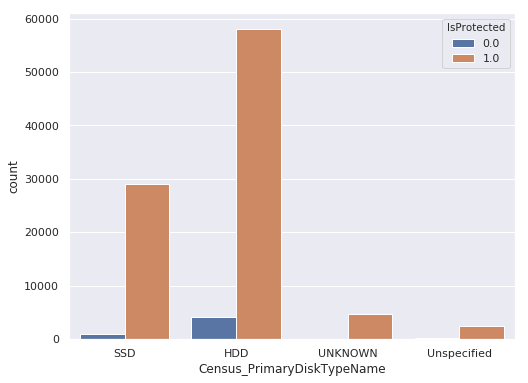

In [22]:
sns.countplot(x="Census_PrimaryDiskTypeName",hue="IsProtected",data=data)

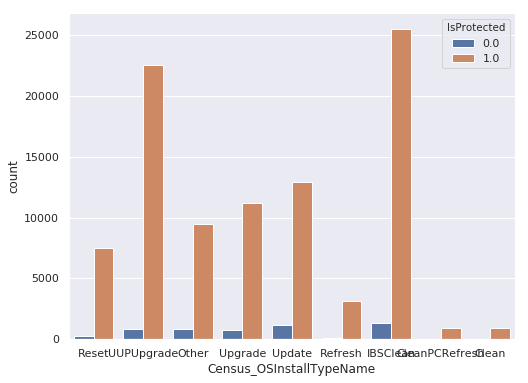

In [23]:
sns.countplot(x="Census_OSInstallTypeName",hue="IsProtected",data=data)#Census_OSInstallTypeName

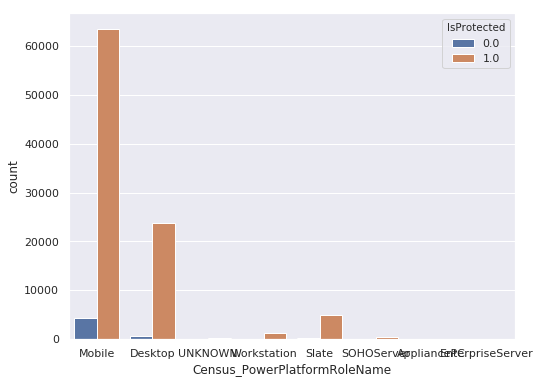

In [24]:
sns.countplot(x="Census_PowerPlatformRoleName",hue="IsProtected",data=data)

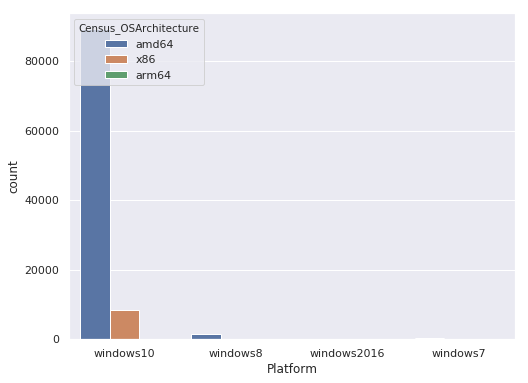

In [25]:
sns.countplot(x="Platform",hue="Census_OSArchitecture",data=data)

In [26]:
    """data['EngineVersion_2'] = df['EngineVersion'].apply(lambda x: x.split('.')[2]).astype('category')
    ['EngineVersion_3'] = df['EngineVersion'].apply(lambda x: x.split('.')[3]).astype('category')

    df['AppVersion_1'] = df['AppVersion'].apply(lambda x: x.split('.')[1]).astype('category')
    df['AppVersion_2'] = df['AppVersion'].apply(lambda x: x.split('.')[2]).astype('category')
    df['AppVersion_3'] = df['AppVersion'].apply(lambda x: x.split('.')[3]).astype('category')

    df['AvSigVersion_0'] = df['AvSigVersion'].apply(lambda x: x.split('.')[0]).astype('category')
    df['AvSigVersion_1'] = df['AvSigVersion'].apply(lambda x: x.split('.')[1]).astype('category')
    df['AvSigVersion_2'] = df['AvSigVersion'].apply(lambda x: x.split('.')[2]).astype('category')

    df['OsBuildLab_0'] = df['OsBuildLab'].apply(lambda x: x.split('.')[0]).astype('category')
    df['OsBuildLab_1'] = df['OsBuildLab'].apply(lambda x: x.split('.')[1]).astype('category')
    df['OsBuildLab_2'] = df['OsBuildLab'].apply(lambda x: x.split('.')[2]).astype('category')
    df['OsBuildLab_3'] = df['OsBuildLab'].apply(lambda x: x.split('.')[3]).astype('category')"""

"data['EngineVersion_2'] = df['EngineVersion'].apply(lambda x: x.split('.')[2]).astype('category')\n['EngineVersion_3'] = df['EngineVersion'].apply(lambda x: x.split('.')[3]).astype('category')\n\ndf['AppVersion_1'] = df['AppVersion'].apply(lambda x: x.split('.')[1]).astype('category')\ndf['AppVersion_2'] = df['AppVersion'].apply(lambda x: x.split('.')[2]).astype('category')\ndf['AppVersion_3'] = df['AppVersion'].apply(lambda x: x.split('.')[3]).astype('category')\n\ndf['AvSigVersion_0'] = df['AvSigVersion'].apply(lambda x: x.split('.')[0]).astype('category')\ndf['AvSigVersion_1'] = df['AvSigVersion'].apply(lambda x: x.split('.')[1]).astype('category')\ndf['AvSigVersion_2'] = df['AvSigVersion'].apply(lambda x: x.split('.')[2]).astype('category')\n\ndf['OsBuildLab_0'] = df['OsBuildLab'].apply(lambda x: x.split('.')[0]).astype('category')\ndf['OsBuildLab_1'] = df['OsBuildLab'].apply(lambda x: x.split('.')[1]).astype('category')\ndf['OsBuildLab_2'] = df['OsBuildLab'].apply(lambda x: x.spl

In [27]:
data.isnull().sum()

ProductName                                    0
EngineVersion                                  0
AppVersion                                     0
AvSigVersion                                   0
IsBeta                                         0
RtpStateBitfield                             443
IsSxsPassiveMode                               0
DefaultBrowsersIdentifier                  96174
AVProductStatesIdentifier                    310
AVProductsInstalled                          310
AVProductsEnabled                            310
HasTpm                                         0
CountryIdentifier                              0
CityIdentifier                              2451
OrganizationIdentifier                     31766
GeoNameIdentifier                              1
LocaleEnglishNameIdentifier                    0
Platform                                       0
Processor                                      0
OsVer                                          0
OsBuild             

In [28]:
def percent(data):
    area=[]
    percent_missing =data.isnull().sum() * 100 / len(data)
    print(percent_missing)
    for i in range(len(percent_missing)):
        if(percent_missing[i]>20):
            area.append(i)
    return(area)

In [29]:
a=percent(data)

ProductName                                 0.000
EngineVersion                               0.000
AppVersion                                  0.000
AvSigVersion                                0.000
IsBeta                                      0.000
RtpStateBitfield                            0.443
IsSxsPassiveMode                            0.000
DefaultBrowsersIdentifier                  96.174
AVProductStatesIdentifier                   0.310
AVProductsInstalled                         0.310
AVProductsEnabled                           0.310
HasTpm                                      0.000
CountryIdentifier                           0.000
CityIdentifier                              2.451
OrganizationIdentifier                     31.766
GeoNameIdentifier                           0.001
LocaleEnglishNameIdentifier                 0.000
Platform                                    0.000
Processor                                   0.000
OsVer                                       0.000


In [30]:
# Printing out the missing values columns 
col=data.columns.tolist()
for i in a:
    print(col[i])    

DefaultBrowsersIdentifier
OrganizationIdentifier
PuaMode
SMode
SmartScreen
Census_ProcessorClass
Census_InternalBatteryType
Census_IsFlightingInternal
Census_ThresholdOptIn
Census_IsWIMBootEnabled


In [31]:
data=data.drop(["DefaultBrowsersIdentifier","OrganizationIdentifier","PuaMode","SMode","SmartScreen","Census_ProcessorClass","Census_InternalBatteryType","Census_IsFlightingInternal","Census_ThresholdOptIn","Census_IsWIMBootEnabled"],axis=1)

In [32]:
print(data.shape)
data=data.fillna(method="ffill")

(100000, 71)


In [33]:
data.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,win8defender,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,53447.0,1.0,1.0,1,43,58552.0,53.0,42,windows10,x64,10.0.0.0,15063,768,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,108.0,1.0,1.0,Notebook,Windows.Desktop,2689.0,30661.0,4.0,5.0,3063.0,488386.0,SSD,123179.0,0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,8.0,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,37.0,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,0.0,Retail,807.0,8554.0,1,0.0,0,0,0.0,0.0,7.0
1,win8defender,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,53447.0,1.0,1.0,1,68,71395.0,276.0,74,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,117.0,1.0,1.0,Notebook,Windows.Desktop,2206.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1882352.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,7.0,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,0.0,Retail,554.0,33105.0,1,0.0,0,0,0.0,1.0,12.0
2,win8defender,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,49480.0,2.0,1.0,1,201,66202.0,267.0,251,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,98.0,1.0,1.0,Notebook,Windows.Desktop,585.0,189533.0,2.0,5.0,2097.0,29820.0,SSD,28678.0,0,4096.0,Notebook,13.9,1280.0,720.0,Mobile,0.0,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,556.0,63396.0,1,0.0,0,0,0.0,1.0,11.0
3,win8defender,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,42160.0,2.0,1.0,1,29,120917.0,35.0,171,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,117.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,171228.0,2.0,5.0,1985.0,476940.0,HDD,439345.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,0.0,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,26.0,119,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,26320.0,1,0.0,0,0,0.0,0.0,10.0
4,win8defender,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,53447.0,1.0,1.0,1,171,124736.0,211.0,182,windows10,x64,10.0.0.0,16299,768,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,117.0,1.0,1.0,Notebook,Windows.Desktop,585.0,189538.0,4.0,5.0,3394.0,476940.0,HDD,461506.0,1,2048.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_S

In [34]:
#.relplot()

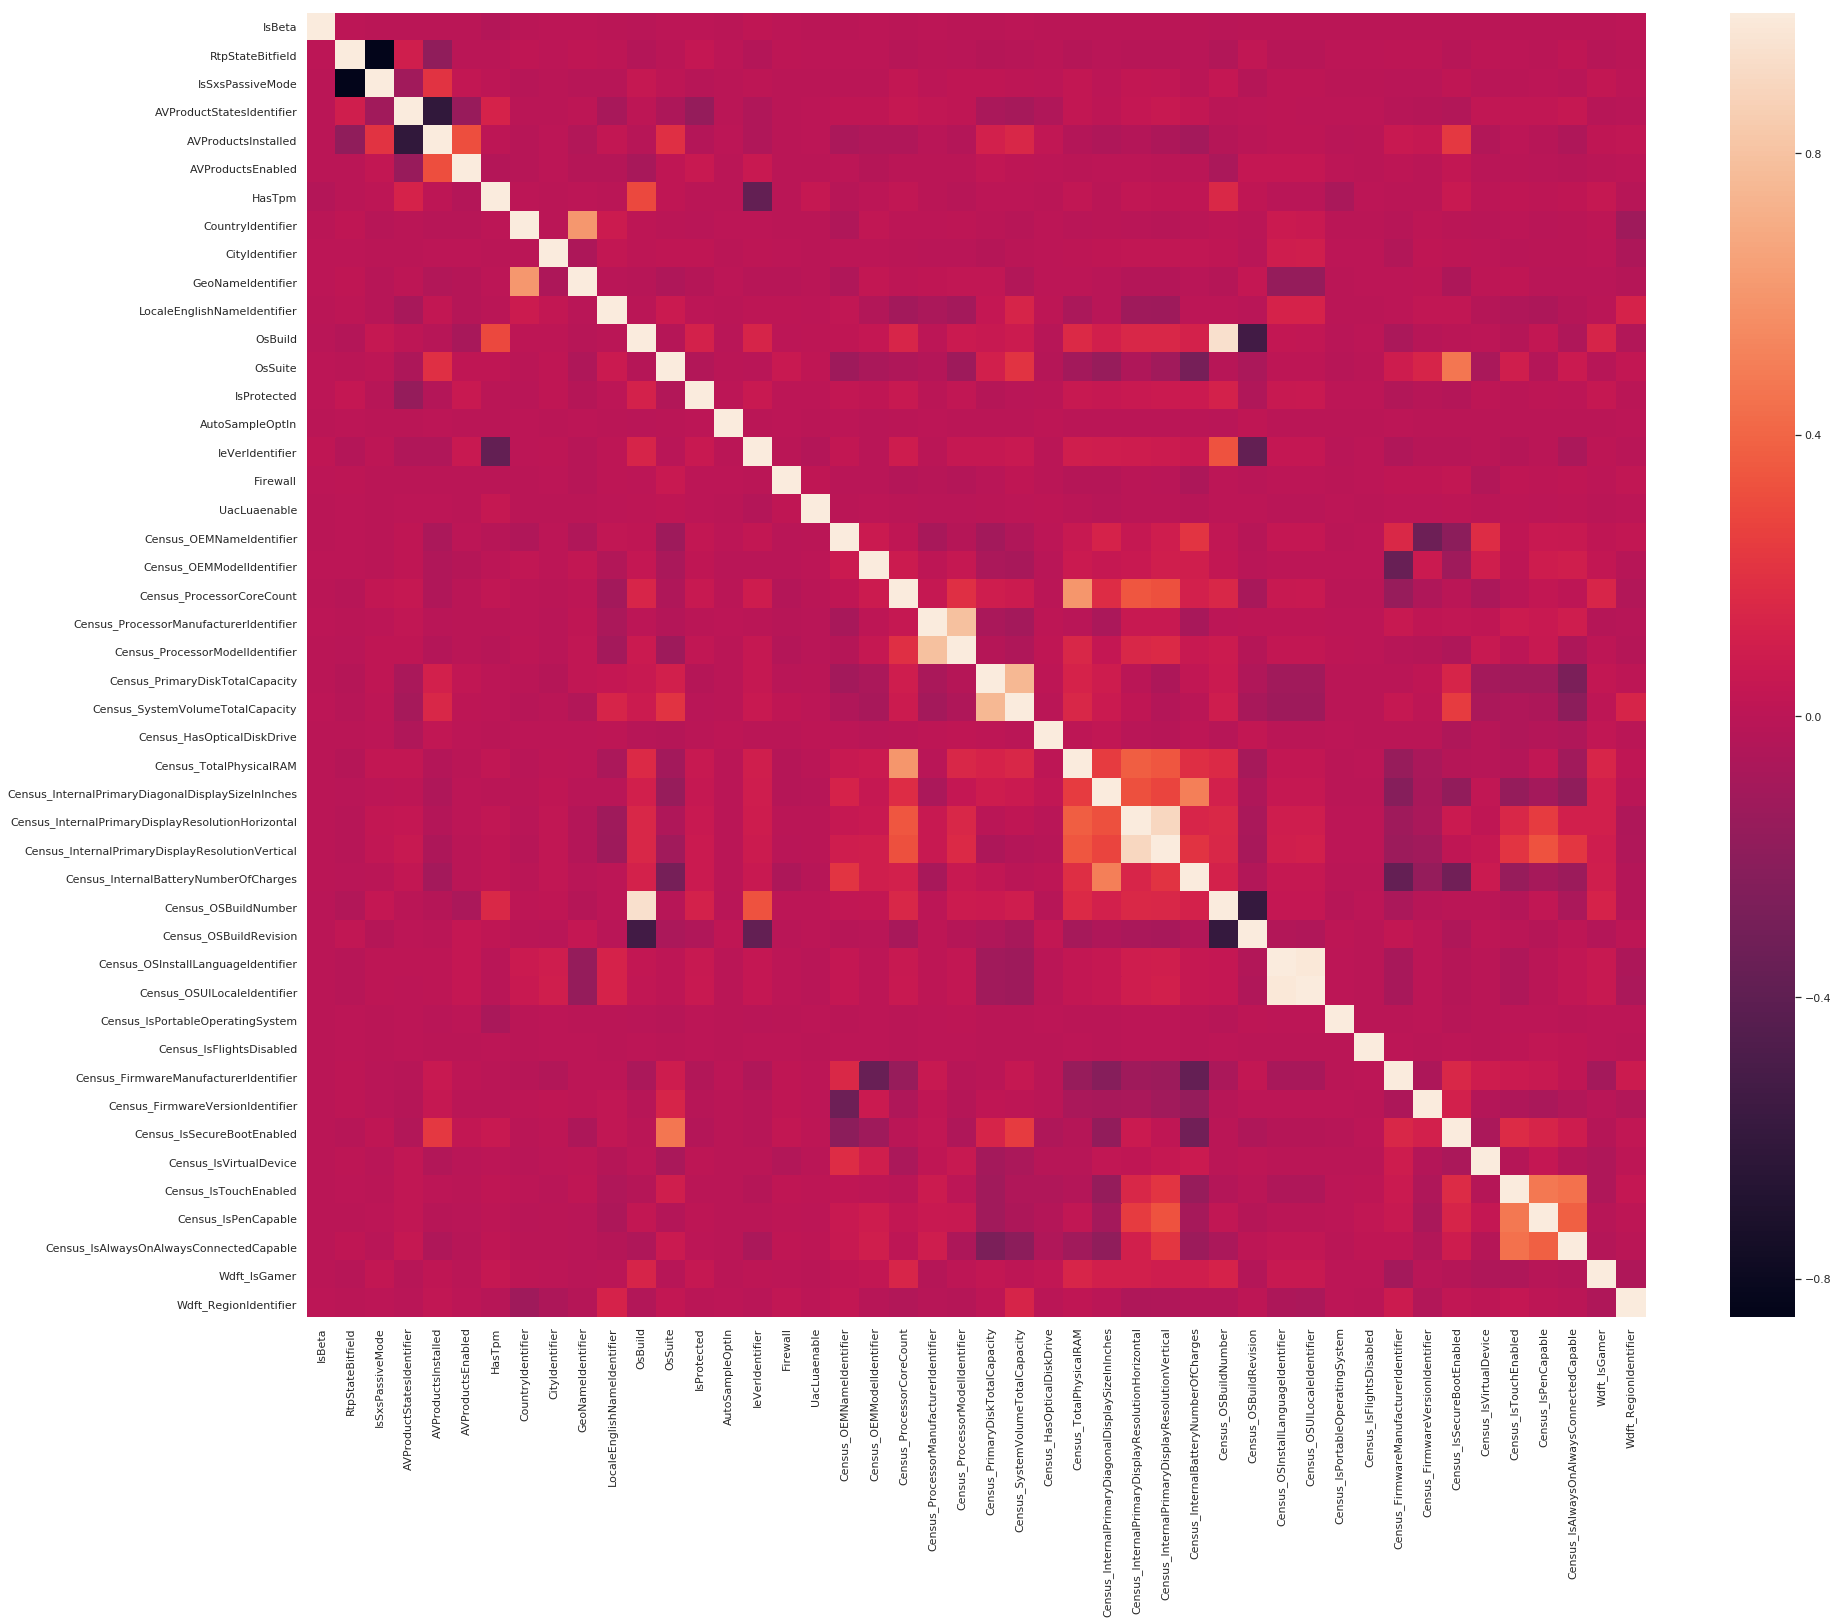

In [35]:
plt.figure(figsize=(30,24))
sns.heatmap(data.corr())


From the above diagram we can see the white patch,which defines that the columns OsSuite and Census_OSBuildNumer are highly correlated to each other,so deleting on won't affect the dataset variance

In [36]:
data.drop(["OsSuite"],axis=1,inplace=True)

In [37]:
y_train=data["IsProtected"]

In [38]:
data.columns.is_numeric()

False

['win8defender' 'mse']


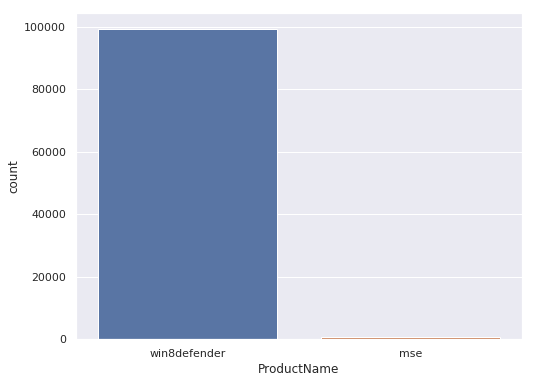

In [39]:
print(data.ProductName.unique())
sns.countplot(data.ProductName)

Thus dropping the Product name column

In [40]:
data.drop(["ProductName"],axis=1,inplace=True)

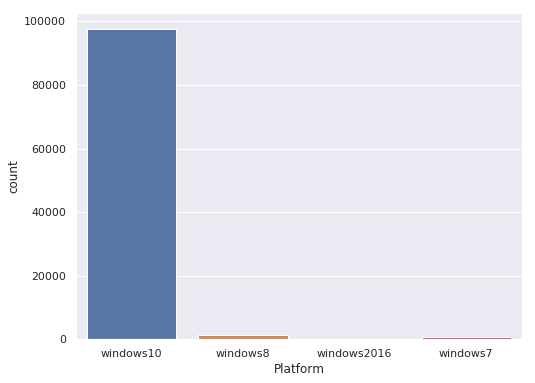

In [41]:
sns.countplot(data["Platform"])

In [42]:
print(data.Platform.unique())
data.drop(["Platform","Census_OSInstallLanguageIdentifier"],axis=1,inplace=True)

['windows10' 'windows8' 'windows2016' 'windows7']


In [43]:
data.shape

(100000, 67)

In [44]:
data.head()

,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Processor,OsVer,OsBuild,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,IeVerIdentifier,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightsDisabled,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier
0,1.1.15400.5,4.18.1810.5,1.281.501.0,0,7.0,0,53447.0,1.0,1.0,1,43,58552.0,53.0,42,x64,10.0.0.0,15063,rs2,15063.0.amd64fre.rs2_release.170317-1834,Home,1.0,0,108.0,1.0,1.0,Notebook,Windows.Desktop,2689.0,30661.0,4.0,5.0,3063.0,488386.0,SSD,123179.0,0,8192.0,Notebook,15.5,1920.0,1080.0,Mobile,8.0,10.0.15063.1387,amd64,rs2_release,15063,1387,Core,CORE,Reset,158,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,OEM:DM,0.0,Retail,807.0,8554.0,1,0.0,0,0,0.0,0.0,7.0
1,1.1.15400.4,4.18.1809.2,1.279.301.0,0,7.0,0,53447.0,1.0,1.0,1,68,71395.0,276.0,74,x64,10.0.0.0,16299,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,117.0,1.0,1.0,Notebook,Windows.Desktop,2206.0,242491.0,4.0,5.0,3410.0,1907729.0,HDD,1882352.0,0,8192.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.16299.611,amd64,rs3_release_svc_escrow,16299,611,Core,CORE,UUPUpgrade,30,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,0.0,Retail,554.0,33105.0,1,0.0,0,0,0.0,1.0,12.0
2,1.1.15300.6,4.18.1809.2,1.277.230.0,0,7.0,0,49480.0,2.0,1.0,1,201,66202.0,267.0,251,x64,10.0.0.0,14393,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,98.0,1.0,1.0,Notebook,Windows.Desktop,585.0,189533.0,2.0,5.0,2097.0,29820.0,SSD,28678.0,0,4096.0,Notebook,13.9,1280.0,720.0,Mobile,0.0,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,148,UNKNOWN,0,IS_GENUINE,OEM:DM,0.0,Retail,556.0,63396.0,1,0.0,0,0,0.0,1.0,11.0
3,1.1.15400.5,4.18.1810.5,1.281.664.0,0,7.0,0,42160.0,2.0,1.0,1,29,120917.0,35.0,171,x64,10.0.0.0,16299,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,117.0,1.0,1.0,Notebook,Windows.Desktop,2668.0,171228.0,2.0,5.0,1985.0,476940.0,HDD,439345.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,0.0,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,119,Notify,0,IS_GENUINE,OEM:DM,0.0,Retail,628.0,26320.0,1,0.0,0,0,0.0,0.0,10.0
4,1.1.15400.4,4.18.1809.2,1.279.236.0,0,7.0,0,53447.0,1.0,1.0,1,171,124736.0,211.0,182,x64,10.0.0.0,16299,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,1.0,0,117.0,1.0,1.0,Notebook,Windows.Desktop,585.0,189538.0,4.0,5.0,3394.0,476940.0,HDD,461506.0,1,2048.0,Notebook,15.5,1366.0,768.0,Mobile,0.0,10.0.16299.371,amd64,rs3_release,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,125,UNKNOWN,0,IS_GENUINE,Retail,0.0,Retail,556.0,63269.0,1,0.0,0,0,0.0,1.0,3.0


In [45]:
#sump_columns_to_drop=[AutoSampleOptIn,IsBeta, 	IsSxsPassiveMode,HasTpm,Processor, 	OsVer, 	OsPlatformSubRelease,SkuEdition,OsBuildLab,AutoSampleOptIn,IsProtected,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily]

In [46]:
#susp_columns=[Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSArchitecture,Census_ProcessorManufacturerIdentifier,Census_PrimaryDiskTypeName,Census_ChassisTypeName,Census_PowerPlatformRoleName,Census_OSArchitecture]

In [47]:
#suspicious_columns=[Census_OSBranch,Census_OSEdition,Census_OSSkuName 	Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName 	Census_IsPortableOperatingSystem 	Census_GenuineStateName 	Census_ActivationChannel 	Census_IsFlightsDisabled 	Census_FlightRing,Census_IsVirtualDevice 	Census_IsTouchEnabled 	Census_IsPenCapable]

In [48]:
columns11=["AutoSampleOptIn","IsBeta","IsSxsPassiveMode","HasTpm","Processor","OsVer","OsPlatformSubRelease","SkuEdition","OsBuildLab","AutoSampleOptIn","IsProtected","Firewall","UacLuaenable","Census_MDC2FormFactor","Census_DeviceFamily","Census_ProcessorManufacturerIdentifier","Census_PrimaryDiskTypeName","Census_ChassisTypeName","Census_PowerPlatformRoleName","Census_OSArchitecture","Census_ProcessorManufacturerIdentifier","Census_PrimaryDiskTypeName","Census_ChassisTypeName","Census_PowerPlatformRoleName","Census_OSArchitecture","Census_OSBranch","Census_OSEdition","Census_OSSkuName","Census_OSInstallTypeName","Census_OSWUAutoUpdateOptionsName","Census_IsPortableOperatingSystem","Census_GenuineStateName","Census_ActivationChannel","Census_IsFlightsDisabled","Census_FlightRing","Census_IsVirtualDevice","Census_IsTouchEnabled","Census_IsPenCapable"]

In [49]:
#suspicious_looking_columns=[Census_OSArchitecture,Census_PrimaryDiskTypeName,Census_IsPenCapable, Census_IsTouchEnable, Census_FlightRing,Census_IsVirtualDevice,Census_IsFlightsDisabled, Census_ActivationChannel,Census_GenuineStateName,Census_IsPortableOperatingSystem] 

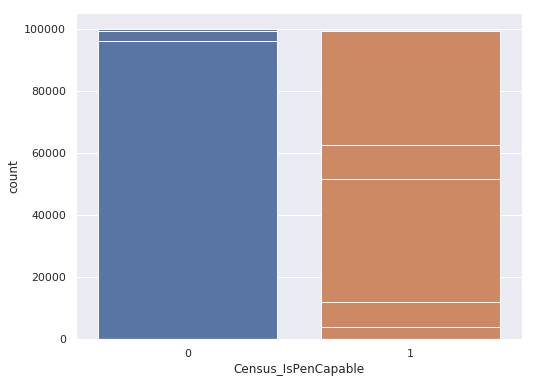

In [50]:
a1l=len(columns11)
for i in range(a1l):
    sns.countplot(data[columns11[i]])

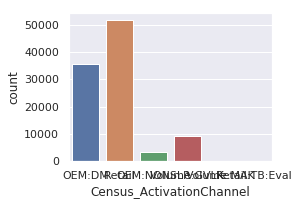

In [51]:
plt.subplot(2,2,1)
sns.countplot(data.Census_ActivationChannel)

In [52]:
data.OsPlatformSubRelease.unique()
data.OsPlatformSubRelease=data.OsPlatformSubRelease.map({'rs2':0,'rs3':1,'rs1':2, 'rs4':3,'prers5':4, 'th2':5, 'th1':6, 'windows8.1':7,'windows7':8})

In [53]:
data.drop(["UacLuaenable","Census_MDC2FormFactor", "Census_DeviceFamily", "Census_ProcessorManufacturerIdentifier","Census_ChassisTypeName","Census_PowerPlatformRoleName"],axis=1,inplace=True)

In [54]:
data.drop(["Census_IsPortableOperatingSystem","Census_GenuineStateName"],axis=1,inplace=True)

In [55]:
data.drop(["Firewall"],axis=1,inplace=True)

In [56]:
print(data.shape)

(100000, 58)


In [57]:
data.Wdft_IsGamer.value_counts()

0.0    70196
1.0    29804
Name: Wdft_IsGamer, dtype: int64

In [58]:
data.Census_OSEdition.unique()

array(['Core', 'CoreSingleLanguage', 'Professional',
       'CoreCountrySpecific', 'ProfessionalEducation', 'Education',
       'Enterprise', 'ServerStandard', 'ProfessionalN', 'EnterpriseS',
       'EducationN', 'CoreN', 'Cloud', 'ServerStandardEval',
       'ServerDatacenterEval', 'ProfessionalWorkstation',
       'ServerSolution', 'EnterpriseSN', 'ProfessionalEducationN',
       'EnterpriseN'], dtype=object)

In [59]:
data.Census_OSEdition.value_counts()

Professional               39520
Core                       35301
CoreSingleLanguage         20359
CoreCountrySpecific         2245
ProfessionalEducation        730
Enterprise                   448
Education                    442
ProfessionalN                412
EnterpriseS                  239
ServerStandard               110
CoreN                         61
Cloud                         59
ServerStandardEval            26
ServerSolution                12
EducationN                    12
EnterpriseSN                  11
ServerDatacenterEval           5
EnterpriseN                    5
ProfessionalEducationN         2
ProfessionalWorkstation        1
Name: Census_OSEdition, dtype: int64

In [60]:
data.Census_OSEdition=data.Census_OSEdition.map({"Core":0,"CoreSingleLanguage":1,"Professional":2,"CoreCountrySpecific":3,"ProfessionalEducation":4,"Education":5,"Enterprise":6,"ServerStandard":7,"ProfessionalN":8,"EnterpriseS":9,"EducationN":10,"CoreN":11,"Cloud":12,"ServerStandardEval":13,"ServerDatacenterEval":14,"ProfessionalWorkstation":15,"ServerSolution":16,"EnterpriseSN":17,"ProfessionalEducationN":18,"EnterpriseN":19})

In [61]:
data.drop(["EngineVersion","AppVersion","AvSigVersion"],axis=1,inplace=True)

In [62]:
data.shape

(100000, 55)

In [63]:
data.drop(["OsBuildLab"],axis=1,inplace=True)

*DOWN BELOW WE SEE THAT THERE IS A LARGE GAP BETWEEN PROTECTED AND NOT-PROTECTED SYSTEM*

In [64]:
data.IsProtected.value_counts()

1.0    94544
0.0     5456
Name: IsProtected, dtype: int64

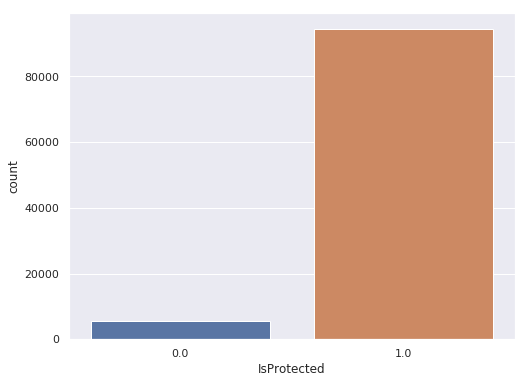

In [65]:
sns.countplot(data.IsProtected)

In [66]:
data.drop("Census_OSVersion",axis=1,inplace=True)

In [67]:
data.SkuEdition.value_counts()

Home               57452
Pro                40778
Invalid              611
Education            419
Enterprise           415
Enterprise LTSB      243
Cloud                 51
Server                31
Name: SkuEdition, dtype: int64

In [68]:
data.SkuEdition=data.SkuEdition.map({"Home":0,"Pro":1,"Invalid":2,"Education":3,"Enterprise":4,"Enterprise LTSB":5,"Cloud":6,"Server":7})

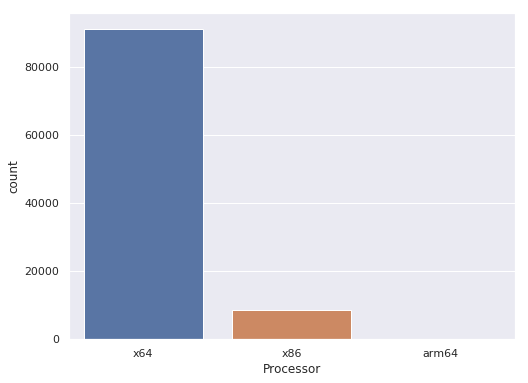

In [69]:
sns.countplot(data.Processor)#.value_counts()

In [70]:
data.drop("Processor",axis=1,inplace=True)

In [71]:
data.Census_PrimaryDiskTypeName.value_counts()

HDD            62514
SSD            29952
UNKNOWN         4920
Unspecified     2614
Name: Census_PrimaryDiskTypeName, dtype: int64

In [72]:
data.drop(["Census_PrimaryDiskTypeName"],axis=1,inplace=True)

In [73]:
data.shape

(100000, 51)

In [74]:
data.drop(["IsSxsPassiveMode","OsVer","OsPlatformSubRelease","SkuEdition","Census_HasOpticalDiskDrive","Census_InternalBatteryNumberOfCharges","Census_OSBranch","Census_OSWUAutoUpdateOptionsName"],axis=1,inplace=True)

In [75]:
data.drop(["Census_IsVirtualDevice","Census_IsTouchEnabled","Census_IsPenCapable","Census_IsAlwaysOnAlwaysConnectedCapable"],axis=1,inplace=True)

In [76]:
data.drop(["Census_FlightRing","Census_ActivationChannel","Census_IsFlightsDisabled"],axis=1,inplace=True)

In [77]:
data.Census_OSSkuName.value_counts()

PROFESSIONAL                    40259
CORE                            35301
CORE_SINGLELANGUAGE             20355
CORE_COUNTRYSPECIFIC             2244
ENTERPRISE                        445
EDUCATION                         443
PROFESSIONAL_N                    414
ENTERPRISE_S                      239
STANDARD_SERVER                   110
CORE_N                             61
CLOUD                              56
STANDARD_EVALUATION_SERVER         26
EDUCATION_N                        12
SB_SOLUTION_SERVER                 12
ENTERPRISE_S_N                     11
ENTERPRISE_N                        6
DATACENTER_EVALUATION_SERVER        5
PRO_WORKSTATION                     1
Name: Census_OSSkuName, dtype: int64

In [78]:
data.Census_OSSkuName=data.Census_OSSkuName.map({"PROFESSIONAL":0,"CORE":1,"CORE_SINGLELANGUAGE":2,"CORE_COUNTRYSPECIFIC":3,"ENTERPRISE":4,"EDUCATION":5,"PROFESSIONAL_N":6,"ENTERPRISE_S":7,"STANDARD_SERVER":8,"CORE_N":9,"CLOUD":10,"STANDARD_EVALUATION_SERVER":11,"EDUCATION_N":12,"SB_SOLUTION_SERVER":13,"ENTERPRISE_S_N":14,"ENTERPRISE_N":15,"DATACENTER_EVALUATION_SERVER":16,"PRO_WORKSTATION":17})     

In [79]:
data.Census_OSInstallTypeName.value_counts()

IBSClean          27015
UUPUpgrade        23405
Update            14148
Upgrade           12047
Other             10374
Reset              7856
Refresh            3263
Clean               979
CleanPCRefresh      913
Name: Census_OSInstallTypeName, dtype: int64

In [80]:
data.Census_OSInstallTypeName=data.Census_OSInstallTypeName.map({"IBSClean":0,"UUPUpgrade":1,"Update":2,"Upgrade":3,"Other":4,"Reset":5,"Refresh":6,"Clean":7,"CleanPCRefresh":8})

In [81]:
data.shape

(100000, 36)

In [82]:
data.head()

,IsBeta,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,IsProtected,AutoSampleOptIn,IeVerIdentifier,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSArchitecture,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
0,0,7.0,53447.0,1.0,1.0,1,43,58552.0,53.0,42,15063,1.0,0,108.0,2689.0,30661.0,4.0,3063.0,488386.0,123179.0,8192.0,15.5,1920.0,1080.0,amd64,15063,1387,0,1,5,158,807.0,8554.0,1,0.0,7.0
1,0,7.0,53447.0,1.0,1.0,1,68,71395.0,276.0,74,16299,1.0,0,117.0,2206.0,242491.0,4.0,3410.0,1907729.0,1882352.0,8192.0,15.5,1366.0,768.0,amd64,16299,611,0,1,1,30,554.0,33105.0,1,1.0,12.0
2,0,7.0,49480.0,2.0,1.0,1,201,66202.0,267.0,251,14393,1.0,0,98.0,585.0,189533.0,2.0,2097.0,29820.0,28678.0,4096.0,13.9,1280.0,720.0,amd64,14393,2189,1,2,4,148,556.0,63396.0,1,1.0,11.0
3,0,7.0,42160.0,2.0,1.0,1,29,120917.0,35.0,171,16299,1.0,0,117.0,2668.0,171228.0,2.0,1985.0,476940.0,439345.0,4096.0,14.0,1366.0,768.0,amd64,16299,371,1,2,3,119,628.0,26320.0,1,0.0,10.0
4,0,7.0,53447.0,1.0,1.0,1,171,124736.0,211.0,182,16299,1.0,0,117.0,585.0,189538.0,4.0,3394.0,476940.0,461506.0,2048.0,15.5,1366.0,768.0,amd64,16299,371,1,2,2,125,556.0,63269.0,1,1.0,3.0


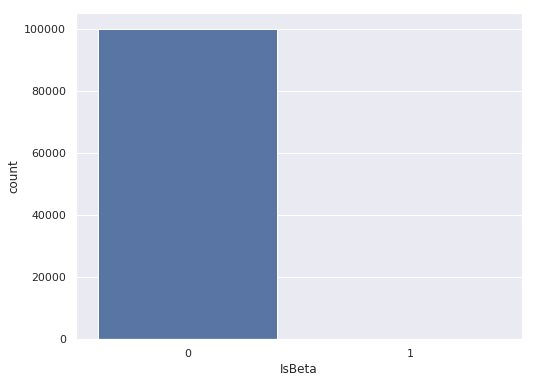

In [83]:
sns.countplot(data.IsBeta)
data.drop("IsBeta",axis=1,inplace=True)

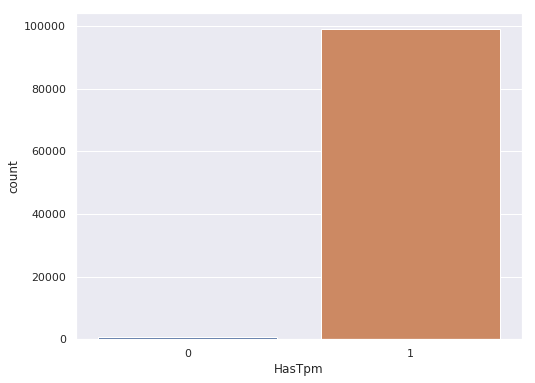

In [84]:
sns.countplot(data["HasTpm"])

In [85]:
data.drop("HasTpm",axis=1,inplace=True)

In [86]:
data.drop("Census_OSArchitecture",axis=1,inplace=True)

In [87]:
data.Census_IsSecureBootEnabled.value_counts()

0    54821
1    45179
Name: Census_IsSecureBootEnabled, dtype: int64

In [88]:
data.head()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,IsProtected,AutoSampleOptIn,IeVerIdentifier,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
0,7.0,53447.0,1.0,1.0,43,58552.0,53.0,42,15063,1.0,0,108.0,2689.0,30661.0,4.0,3063.0,488386.0,123179.0,8192.0,15.5,1920.0,1080.0,15063,1387,0,1,5,158,807.0,8554.0,1,0.0,7.0
1,7.0,53447.0,1.0,1.0,68,71395.0,276.0,74,16299,1.0,0,117.0,2206.0,242491.0,4.0,3410.0,1907729.0,1882352.0,8192.0,15.5,1366.0,768.0,16299,611,0,1,1,30,554.0,33105.0,1,1.0,12.0
2,7.0,49480.0,2.0,1.0,201,66202.0,267.0,251,14393,1.0,0,98.0,585.0,189533.0,2.0,2097.0,29820.0,28678.0,4096.0,13.9,1280.0,720.0,14393,2189,1,2,4,148,556.0,63396.0,1,1.0,11.0
3,7.0,42160.0,2.0,1.0,29,120917.0,35.0,171,16299,1.0,0,117.0,2668.0,171228.0,2.0,1985.0,476940.0,439345.0,4096.0,14.0,1366.0,768.0,16299,371,1,2,3,119,628.0,26320.0,1,0.0,10.0
4,7.0,53447.0,1.0,1.0,171,124736.0,211.0,182,16299,1.0,0,117.0,585.0,189538.0,4.0,3394.0,476940.0,461506.0,2048.0,15.5,1366.0,768.0,16299,371,1,2,2,125,556.0,63269.0,1,1.0,3.0


In [89]:
data.AVProductsInstalled.value_counts()

1.0    74739
2.0    23214
3.0     1950
4.0       90
5.0        7
Name: AVProductsInstalled, dtype: int64

In [90]:
print(data.AutoSampleOptIn.value_counts())
data.drop("AutoSampleOptIn",axis=1,inplace=True)

0    99999
1        1
Name: AutoSampleOptIn, dtype: int64


In [91]:
data.shape

(100000, 32)

In [92]:
data.head()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,IsProtected,IeVerIdentifier,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
0,7.0,53447.0,1.0,1.0,43,58552.0,53.0,42,15063,1.0,108.0,2689.0,30661.0,4.0,3063.0,488386.0,123179.0,8192.0,15.5,1920.0,1080.0,15063,1387,0,1,5,158,807.0,8554.0,1,0.0,7.0
1,7.0,53447.0,1.0,1.0,68,71395.0,276.0,74,16299,1.0,117.0,2206.0,242491.0,4.0,3410.0,1907729.0,1882352.0,8192.0,15.5,1366.0,768.0,16299,611,0,1,1,30,554.0,33105.0,1,1.0,12.0
2,7.0,49480.0,2.0,1.0,201,66202.0,267.0,251,14393,1.0,98.0,585.0,189533.0,2.0,2097.0,29820.0,28678.0,4096.0,13.9,1280.0,720.0,14393,2189,1,2,4,148,556.0,63396.0,1,1.0,11.0
3,7.0,42160.0,2.0,1.0,29,120917.0,35.0,171,16299,1.0,117.0,2668.0,171228.0,2.0,1985.0,476940.0,439345.0,4096.0,14.0,1366.0,768.0,16299,371,1,2,3,119,628.0,26320.0,1,0.0,10.0
4,7.0,53447.0,1.0,1.0,171,124736.0,211.0,182,16299,1.0,117.0,585.0,189538.0,4.0,3394.0,476940.0,461506.0,2048.0,15.5,1366.0,768.0,16299,371,1,2,2,125,556.0,63269.0,1,1.0,3.0


**APPLYING SMOTE FOR PROCESSING DATASET**

In [93]:
smt=SMOTE()

In [94]:
train_X=data.drop("IsProtected",axis=1)

In [95]:
train_y=data["IsProtected"]

In [96]:
train_X.shape

(100000, 31)

In [97]:
X_train,y_train=smt.fit_sample(train_X,train_y)

In [98]:
X_train.shape

(189088, 31)

In [99]:
y_train.shape

(189088,)

In [100]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [101]:
x_train=sc.fit_transform(X_train)

In [102]:
pc=PCA(n_components=3)

In [103]:
x_train_pro=pc.fit_transform(x_train)

In [104]:
print(x_train_pro.shape)
print(y_train.shape)

(189088, 3)
(189088,)


*Preparing test dataset*

In [105]:
test_data.shape

(100000, 82)

In [106]:
coll=[]
for x in data.columns:
    coll.append(str(x))

In [107]:
test_data=test_data[coll]

In [108]:
test_data.head()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,IsProtected,IeVerIdentifier,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
0,7.0,53447.0,1.0,1.0,43,58552.0,53.0,42,15063,1.0,108.0,2689.0,30661.0,4.0,3063.0,488386.0,123179.0,8192.0,15.5,1920.0,1080.0,15063,1387,Core,CORE,Reset,158,807.0,8554.0,1,0.0,7.0
1,7.0,53447.0,1.0,1.0,68,71395.0,276.0,74,16299,1.0,117.0,2206.0,242491.0,4.0,3410.0,1907729.0,1882352.0,8192.0,15.5,1366.0,768.0,16299,611,Core,CORE,UUPUpgrade,30,554.0,33105.0,1,1.0,12.0
2,7.0,49480.0,2.0,1.0,201,66202.0,267.0,251,14393,1.0,98.0,585.0,189533.0,2.0,2097.0,29820.0,28678.0,4096.0,13.9,1280.0,720.0,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,148,556.0,63396.0,1,1.0,11.0
3,7.0,42160.0,2.0,1.0,29,120917.0,35.0,171,16299,1.0,117.0,2668.0,171228.0,2.0,1985.0,476940.0,439345.0,4096.0,14.0,1366.0,768.0,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,119,628.0,26320.0,1,0.0,10.0
4,7.0,53447.0,1.0,1.0,171,124736.0,211.0,182,16299,1.0,117.0,585.0,189538.0,4.0,3394.0,476940.0,461506.0,2048.0,15.5,1366.0,768.0,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,125,556.0,63269.0,1,1.0,3.0


In [109]:
percent(test_data)

RtpStateBitfield                                     0.443
AVProductStatesIdentifier                            0.310
AVProductsInstalled                                  0.310
AVProductsEnabled                                    0.310
CountryIdentifier                                    0.000
CityIdentifier                                       2.451
GeoNameIdentifier                                    0.001
LocaleEnglishNameIdentifier                          0.000
OsBuild                                              0.000
IsProtected                                          0.309
IeVerIdentifier                                      0.650
Census_OEMNameIdentifier                             1.150
Census_OEMModelIdentifier                            1.223
Census_ProcessorCoreCount                            0.818
Census_ProcessorModelIdentifier                      0.819
Census_PrimaryDiskTotalCapacity                      0.992
Census_SystemVolumeTotalCapacity                     0.9

[]

In [110]:
test_data=test_data.fillna(method="ffill")

In [111]:
#test_data.Census_OSInstallTypeName=test_data.Census_OSInstallTypeName.map({"IBSClean":0,"UUPUpgrade":1,"Update":2,"Upgrade":3,"Other":4,"Reset":5,"Refresh":6,"Clean":7,"CleanPCRefresh":8})

In [112]:
#test_data.Census_OSSkuName=test_data.Census_OSSkuName.map({"PROFESSIONAL":0,"CORE":1,"CORE_SINGLELANGUAGE":2,"CORE_COUNTRYSPECIFIC":3,"ENTERPRISE":4,"EDUCATION":5,"PROFESSIONAL_N":6,"ENTERPRISE_S":7,"STANDARD_SERVER":8,"CORE_N":9,"CLOUD":10,"STANDARD_EVALUATION_SERVER":11,"EDUCATION_N":12,"SB_SOLUTION_SERVER":13,"ENTERPRISE_S_N":14,"ENTERPRISE_N":15,"DATACENTER_EVALUATION_SERVER":16,"PRO_WORKSTATION":17})     

In [113]:
test_data.head()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,IsProtected,IeVerIdentifier,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
0,7.0,53447.0,1.0,1.0,43,58552.0,53.0,42,15063,1.0,108.0,2689.0,30661.0,4.0,3063.0,488386.0,123179.0,8192.0,15.5,1920.0,1080.0,15063,1387,Core,CORE,Reset,158,807.0,8554.0,1,0.0,7.0
1,7.0,53447.0,1.0,1.0,68,71395.0,276.0,74,16299,1.0,117.0,2206.0,242491.0,4.0,3410.0,1907729.0,1882352.0,8192.0,15.5,1366.0,768.0,16299,611,Core,CORE,UUPUpgrade,30,554.0,33105.0,1,1.0,12.0
2,7.0,49480.0,2.0,1.0,201,66202.0,267.0,251,14393,1.0,98.0,585.0,189533.0,2.0,2097.0,29820.0,28678.0,4096.0,13.9,1280.0,720.0,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Other,148,556.0,63396.0,1,1.0,11.0
3,7.0,42160.0,2.0,1.0,29,120917.0,35.0,171,16299,1.0,117.0,2668.0,171228.0,2.0,1985.0,476940.0,439345.0,4096.0,14.0,1366.0,768.0,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,119,628.0,26320.0,1,0.0,10.0
4,7.0,53447.0,1.0,1.0,171,124736.0,211.0,182,16299,1.0,117.0,585.0,189538.0,4.0,3394.0,476940.0,461506.0,2048.0,15.5,1366.0,768.0,16299,371,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,125,556.0,63269.0,1,1.0,3.0


In [114]:
test_data.Census_OSSkuName.value_counts()

PROFESSIONAL                    40259
CORE                            35301
CORE_SINGLELANGUAGE             20355
CORE_COUNTRYSPECIFIC             2244
ENTERPRISE                        445
EDUCATION                         443
PROFESSIONAL_N                    414
ENTERPRISE_S                      239
STANDARD_SERVER                   110
CORE_N                             61
CLOUD                              56
STANDARD_EVALUATION_SERVER         26
EDUCATION_N                        12
SB_SOLUTION_SERVER                 12
ENTERPRISE_S_N                     11
ENTERPRISE_N                        6
DATACENTER_EVALUATION_SERVER        5
PRO_WORKSTATION                     1
Name: Census_OSSkuName, dtype: int64

In [115]:
test_data.Census_OSSkuName=test_data.Census_OSSkuName.map({"PROFESSIONAL":0,"CORE":1,"CORE_SINGLELANGUAGE":2,"CORE_COUNTRYSPECIFIC":3,"ENTERPRISE":4,"EDUCATION":5,"PROFESSIONAL_N":6,"ENTERPRISE_S":7,"STANDARD_SERVER":8,"CORE_N":9,"CLOUD":10,"STANDARD_EVALUATION_SERVER":11,"SB_SOLUTION_SERVER":13,"ENTERPRISE_S_N":14,"ENTERPRISE_N":15,"DATACENTER_EVALUATION_SERVER":16,"PRO_WORKSTATION":17})     

In [116]:
test_data.Census_OSEdition.value_counts()

Professional               39520
Core                       35301
CoreSingleLanguage         20359
CoreCountrySpecific         2245
ProfessionalEducation        730
Enterprise                   448
Education                    442
ProfessionalN                412
EnterpriseS                  239
ServerStandard               110
CoreN                         61
Cloud                         59
ServerStandardEval            26
ServerSolution                12
EducationN                    12
EnterpriseSN                  11
ServerDatacenterEval           5
EnterpriseN                    5
ProfessionalEducationN         2
ProfessionalWorkstation        1
Name: Census_OSEdition, dtype: int64

In [117]:
test_data["Census_OSEdition"]=test_data["Census_OSEdition"].map({"Professional":0,"Core":1,"CoreSingleLanguage":2,"CoreCountrySpecific":3,"Enterprise":4,"Education":5,"ProfessionalN":6,"EnterpriseS ":7,"ServerStandard":8,"CoreN":9,"ProfessionalEducation":10,"Cloud":11,"ServerStandardEval":12,"ServerSolution":13,"EducationN":14,"EnterpriseSN":15,"EnterpriseN":16,"ServerDatacenterEval":17,"ProfessionalEducationN":18,"ProfessionalWorkstation":19})

In [118]:
test_data.head()

,RtpStateBitfield,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,CountryIdentifier,CityIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsBuild,IsProtected,IeVerIdentifier,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_SystemVolumeTotalCapacity,Census_TotalPhysicalRAM,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSUILocaleIdentifier,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Wdft_IsGamer,Wdft_RegionIdentifier
0,7.0,53447.0,1.0,1.0,43,58552.0,53.0,42,15063,1.0,108.0,2689.0,30661.0,4.0,3063.0,488386.0,123179.0,8192.0,15.5,1920.0,1080.0,15063,1387,1.0,1.0,Reset,158,807.0,8554.0,1,0.0,7.0
1,7.0,53447.0,1.0,1.0,68,71395.0,276.0,74,16299,1.0,117.0,2206.0,242491.0,4.0,3410.0,1907729.0,1882352.0,8192.0,15.5,1366.0,768.0,16299,611,1.0,1.0,UUPUpgrade,30,554.0,33105.0,1,1.0,12.0
2,7.0,49480.0,2.0,1.0,201,66202.0,267.0,251,14393,1.0,98.0,585.0,189533.0,2.0,2097.0,29820.0,28678.0,4096.0,13.9,1280.0,720.0,14393,2189,2.0,2.0,Other,148,556.0,63396.0,1,1.0,11.0
3,7.0,42160.0,2.0,1.0,29,120917.0,35.0,171,16299,1.0,117.0,2668.0,171228.0,2.0,1985.0,476940.0,439345.0,4096.0,14.0,1366.0,768.0,16299,371,2.0,2.0,Upgrade,119,628.0,26320.0,1,0.0,10.0
4,7.0,53447.0,1.0,1.0,171,124736.0,211.0,182,16299,1.0,117.0,585.0,189538.0,4.0,3394.0,476940.0,461506.0,2048.0,15.5,1366.0,768.0,16299,371,2.0,2.0,Update,125,556.0,63269.0,1,1.0,3.0


In [119]:
test_data["Census_OSInstallTypeName"].value_counts()

IBSClean          27015
UUPUpgrade        23405
Update            14148
Upgrade           12047
Other             10374
Reset              7856
Refresh            3263
Clean               979
CleanPCRefresh      913
Name: Census_OSInstallTypeName, dtype: int64

In [120]:
test_data["Census_OSInstallTypeName"]=test_data["Census_OSInstallTypeName"].map({"IBSClean":27015,"UUPUpgrade":23405,"Update":14148,"Upgrade":12047,"Other":10374,"Reset":7856,"Refresh":3263,"Clean":979,"CleanPCRefresh":913})

In [121]:
test_data.head()
test_data=test_data.fillna(method="ffill")

In [122]:
x_testdata=test_data.drop(["IsProtected"],axis=1)
y_testdata=test_data["IsProtected"]
print(x_testdata.shape)
print(y_testdata.shape)
x_testdata.fillna(method="ffill")
x_testdata=sc.fit_transform(x_testdata)
#x_testdata.fillna(method="ffill")
x_testdata=pc.fit_transform(x_testdata)

(100000, 31)
(100000,)


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [123]:
x_testdata.shape

(100000, 3)

* 1. 1. *MODEL-1 :**lightgbm***

In [124]:
x_pre_train=x_train_pro[:150000]
y_pre_train=y_train[:150000]

In [125]:
print(x_train_pro.shape)
print(y_train.shape)
print(x_testdata.shape,y_testdata.shape)

(189088, 3)
(189088,)
(100000, 3) (100000,)


In [126]:
"""Index(['RtpStateBitfield', 'AVProductStatesIdentifier', 'AVProductsInstalled',
       'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier',
       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',
       'IsProtected', 'IeVerIdentifier', 'Firewall',
       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',
       'Census_ProcessorCoreCount', 'Census_ProcessorModelIdentifier',
       'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity',
       'Census_TotalPhysicalRAM',
       'Census_InternalPrimaryDiagonalDisplaySizeInInches',
       'Census_InternalPrimaryDisplayResolutionHorizontal',
       'Census_InternalPrimaryDisplayResolutionVertical',
       'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSEdition',
       'Census_OSSkuName', 'Census_OSInstallTypeName',
       'Census_OSUILocaleIdentifier', 'Census_IsPortableOperatingSystem',]"""

"Index(['RtpStateBitfield', 'AVProductStatesIdentifier', 'AVProductsInstalled',\n       'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier',\n       'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild',\n       'IsProtected', 'IeVerIdentifier', 'Firewall',\n       'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier',\n       'Census_ProcessorCoreCount', 'Census_ProcessorModelIdentifier',\n       'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity',\n       'Census_TotalPhysicalRAM',\n       'Census_InternalPrimaryDiagonalDisplaySizeInInches',\n       'Census_InternalPrimaryDisplayResolutionHorizontal',\n       'Census_InternalPrimaryDisplayResolutionVertical',\n       'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSEdition',\n       'Census_OSSkuName', 'Census_OSInstallTypeName',\n       'Census_OSUILocaleIdentifier', 'Census_IsPortableOperatingSystem',]"

In [127]:
import lightgbm as lgb

In [128]:
print(x_pre_train.shape,y_pre_train.shape)
#print(x_train_pro[150000:].shape,y_pp.shape)

(150000, 3) (150000,)


In [129]:
model = lgb.LGBMClassifier(n_estimators=3000, colsample_bytree=0.2, objective='binary', num_leaves=16,max_depth=-1, learning_rate=0.1)

In [130]:
h=model.fit(x_train_pro,y_train, eval_metric='auc',
          eval_set=[(x_testdata,y_testdata)], verbose=250,
          early_stopping_rounds=500)

Training until validation scores don't improve for 500 rounds.
[250]	valid_0's binary_logloss: 0.736295	valid_0's auc: 0.652125
[500]	valid_0's binary_logloss: 0.73967	valid_0's auc: 0.649733
Early stopping, best iteration is:
[5]	valid_0's binary_logloss: 0.689781	valid_0's auc: 0.653044


In [131]:
yyy=model.predict(x_testdata)

In [132]:
x11=sub_data["MachineIdentifier"]

In [133]:
submission = pd.DataFrame({"MachineIdentifier":x11,"HasDetections":yyy})
submission.to_csv('submission.csv', index=False)
#submission.to_csv('lgb_submission.csv', index=False)

In [134]:
sub_data["HasDetections"]=yyy

In [135]:
sub_data.head()

,MachineIdentifier,HasDetections
0,0000010489e3af074adeac69c53e555e,0.0
1,00000176ac758d54827acd545b6315a5,1.0
2,0000019dcefc128c2d4387c1273dae1d,0.0
3,0000055553dc51b1295785415f1a224d,0.0
4,00000574cefffeca83ec8adf9285b2bf,0.0
